# Wind Statistics

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [39]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [40]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [41]:
# Define the URL
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"

#Read the data

data = pd.read_csv(url, sep=r'\s+', header=None)

- sep=r'\s+' is used because the data is separated by whitespace rather than commas.
- header=None is specified to indicate that the data file does not contain a header row.

In [42]:
# Display the first few rows of the dataframe
print(data.head())

   0   1   2      3      4      5      6      7     8      9      10     11  \
0  Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL   
1  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
3  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
4  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   

      12     13     14  
0    CLO    BEL    MAL  
1  12.58  18.50  15.04  
2   9.67  17.54  13.83  
3   7.67  12.75  12.71  
4   5.88   5.46  10.88  


It looks like the first row of the data is actually the header. To properly read the data, including this row as the header, we can use the header parameter to indicate that the first row should be used as the header row.

In [43]:
# Read the data, specifying the first row as the header
data = pd.read_csv(url, sep=r'\s+', header=0)

In [44]:
data.head(30)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,61,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,61,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,61,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,61,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,61,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


#### How to replace the first 3 columns by a proper datetime index?

We will first need to create a datetime column that combines the first three columns:

In [45]:
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('/'.join, axis=1), format='%y/%m/%d')

- The pd.to_datetime function is used to convert the concatenated string of year, month, and day into a datetime object.
- The agg('-'.join, axis=1) function concatenates the year, month, and day columns with hyphens to form a date string.

In [46]:
# Set the Date time column as index
data.set_index('Date', inplace=True)

- The set_index method sets the new 'Date' column as the index of the DataFrame.

In [47]:
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,,,,
2061-01-01,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Since we created a Datetime column combining the first three columns of the DataFraMe, we remove these columns :


In [48]:
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

In [49]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [50]:
column_type = data.index.dtype
column_type

dtype('<M8[ns]')

The correct_year function checks if the year is greater than 2000. If it is, it subtracts 100 years from it to correct the date.Otherwise it returns the date unchanged.

In [51]:
# Function to correct the year
def correct_year(date):
    if date.year > 2000:  # assuming any year > 2000 is incorrect and needs correction
        corrected_date = date.replace(year=date.year - 100)
        return corrected_date
    return date

# Apply the function to the index
#df.index = df.index.map(correct_year) applies the correct_year function to each element in the index.
data.index = data.index.map(correct_year)

# Check the data type of the index after correction
index_dtype = data.index.dtype
print(f"Data type of the index column: {index_dtype}")

# Display DataFrame after correction
data

Data type of the index column: datetime64[ns]


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

We can use the isna() method .Each entry is True if the original value is missing (Nan) and "False" otherwise.Then we can use the sum() method to count the "True" values (representing the missing values) and sum over all the rows and columns to get the total count of missing values.

Missing values for each location:

In [56]:
missing_values_count = data.isna().sum()

In [59]:
missing_values_count

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

- df.isna() creates a DataFrame of the same shape as "data", with True where the data is NaN and False otherwise.
- df.isna().sum() sums up the True values column-wise, resulting in a Series with the count of missing values per column.

If we want to count the sum of True values over all rows and columns (Entire DataFrame) :


### Step 7. Compute how many non-missing values there are in total.

In [58]:
missing_values_count.sum()

31

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [62]:
mean_windspreeds = data.mean()

In [63]:
mean_windspreeds

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [64]:
print("The mean windspeed over all locations and all times is:", mean_windspreeds.mean())

The mean windspeed over all locations and all times is: 10.227982360836938


- data.mean(): This calculates the mean for each column (location).
mean_windspreeds.mean(): This calculates the mean of these means, resulting in a single number representing the overall mean windspeed across all locations and times.
----> Or we could do this in one line : data.mean().mean()

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

Using agg method: The agg method is used with a list of statistics ('min', 'max', 'mean', 'std') to calculate these for each column (location).

In [72]:
loc_stats = data.agg(["min", "max", "mean","std"])

In [73]:
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


#### Learned about :

Transpose: The result is transposed for better readability, making each row represent a location with its corresponding statistics. Flipping the rows and columns of the DataFrame. In other words, the rows become columns and the columns become rows.

In [74]:
loc_stats = data.agg(["min", "max", "mean","std"]).transpose()

In [75]:
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


 Transposing this DataFrame made each row represent a location and each column represent a statistic, which is easier to read and analyze.

### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

We need to filter out the DataFrame by month, in this case January .Lets filter out the DataFrame to include only the rows that contain January Month == 1

In [76]:
january_stats = data[data.index.month == 1].groupby(data.index.month)

ValueError: Grouper and axis must be same length

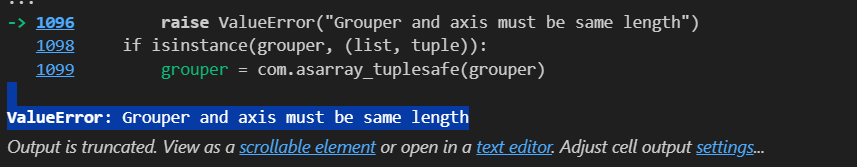

There is obviously a mismatch between the DataFrames length and the grouping vector.First lets ensure index is of DateTime type: 

In [80]:
data.index = pd.to_datetime(data.index)
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [87]:

# Filter for January
january_data = data[data.index.month == 1]

In [88]:
# calculate mean for each location for January month

january_mean = january_data.mean()
january_mean

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64